In [1]:
# dataset location http://archive.ics.uci.edu/ml/datasets/heart+Disease
import os
os.chdir(r"C:\Users\Collin\Documents\collins documents\Regis Homework\Machine Learning wk 1\assign_wk1\assign_wk1")
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
#importing necessary packages and setting directory

In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Collin\OneDrive\Python\lib\site-packages\matplotlib\

In [2]:
df =  pd.read_csv('heart.disease.data', na_values = -9)
# Getting rid of null values while importing data 
#Credit to Dr. SIRI for code in discussion thread "https://worldclass.regis.edu/d2l/le/273431/discussions/topics/629644/View" 

In [3]:
df.head()
#viewing dataset

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50.0,20.0,1,NaN,1,2,150,0,6.0,0
1,67,1,4,160,286,40.0,40.0,0,NaN,1,2,108,1,3.0,2
2,67,1,4,120,229,20.0,35.0,0,NaN,1,2,129,1,7.0,1
3,37,1,3,130,250,0.0,0.0,0,NaN,1,0,187,0,3.0,0
4,41,0,2,130,204,0.0,0.0,0,NaN,1,2,172,0,3.0,0


In [4]:
column_list = list(df)
column_list
#saving a list of column headers to reinsert them after the simple imputer

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'cigs',
 'years',
 'fbs',
 'dm',
 'famhist',
 'restecg',
 'thalach',
 'exang',
 'thal',
 'num']

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns = column_list)
#imputing 

In [6]:
df.head()
#Checking Data after Imputer

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63.0,1.0,1.0,145.0,233.0,50.0,20.0,1.0,1.0,1.0,2.0,150.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,40.0,40.0,0.0,1.0,1.0,2.0,108.0,1.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,20.0,35.0,0.0,1.0,1.0,2.0,129.0,1.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,1.0,1.0,0.0,187.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,0.0,0.0,1.0,1.0,2.0,172.0,0.0,3.0,0.0


In [7]:
df.info()
#making sure rows still line up with non-null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       282 non-null    float64
 2   cp        282 non-null    float64
 3   trestbps  282 non-null    float64
 4   chol      282 non-null    float64
 5   cigs      282 non-null    float64
 6   years     282 non-null    float64
 7   fbs       282 non-null    float64
 8   dm        282 non-null    float64
 9   famhist   282 non-null    float64
 10  restecg   282 non-null    float64
 11  thalach   282 non-null    float64
 12  exang     282 non-null    float64
 13  thal      282 non-null    float64
 14  num       282 non-null    float64
dtypes: float64(15)
memory usage: 33.2 KB


In [8]:
df.describe()
#EDA with descriptive statistics

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.0,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.920578,15.259928,0.148936,1.0,0.620567,1.014184,149.765957,0.326241,4.678571,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.278097,15.230528,0.356658,0.0,0.486108,0.998118,22.923869,0.469670,1.932188,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,71.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,15.000000,15.129964,0.000000,1.0,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,1.0,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.0,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
age,1.000000,-0.091125,0.077383,0.274466,0.218295,-0.125275,0.067795,0.104400,NaN,0.025888,0.134438,-0.393266,0.087174,0.104011,0.210747
sex,-0.091125,1.000000,0.022619,-0.058920,-0.189397,0.329457,0.240170,0.054396,NaN,-0.070785,0.032665,-0.054792,0.189095,0.389613,0.239516
cp,0.077383,0.022619,1.000000,-0.070886,0.098889,0.084592,0.076314,-0.071550,NaN,0.110754,0.061007,-0.318512,0.364757,0.259217,0.383891
trestbps,0.274466,-0.058920,-0.070886,1.000000,0.157118,-0.027706,0.057198,0.142902,NaN,0.057441,0.128652,-0.029739,0.061072,0.123223,0.151776
chol,0.218295,-0.189397,0.098889,0.157118,1.000000,-0.101691,-0.032904,0.019506,NaN,0.071592,0.166490,-0.018392,0.088988,0.041478,0.098895
cigs,-0.125275,0.329457,0.084592,-0.027706,-0.101691,1.000000,0.640183,0.050855,NaN,-0.033197,-0.029392,-0.005414,0.048009,0.191170,0.045190
years,0.067795,0.240170,0.076314,0.057198,-0.032904,0.640183,1.000000,-0.014188,NaN,0.061791,-0.083521,-0.005170,0.014729,0.211198,0.076497
fbs,0.104400,0.054396,-0.071550,0.142902,0.019506,0.050855,-0.014188,1.000000,NaN,-0.042363,0.054025,0.019948,0.027573,0.062891,0.039690
dm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
famhist,0.025888,-0.070785,0.110754,0.057441,0.071592,-0.033197,0.061791,-0.042363,NaN,1.000000,0.055140,-0.002568,-0.001437,0.011096,0.048619


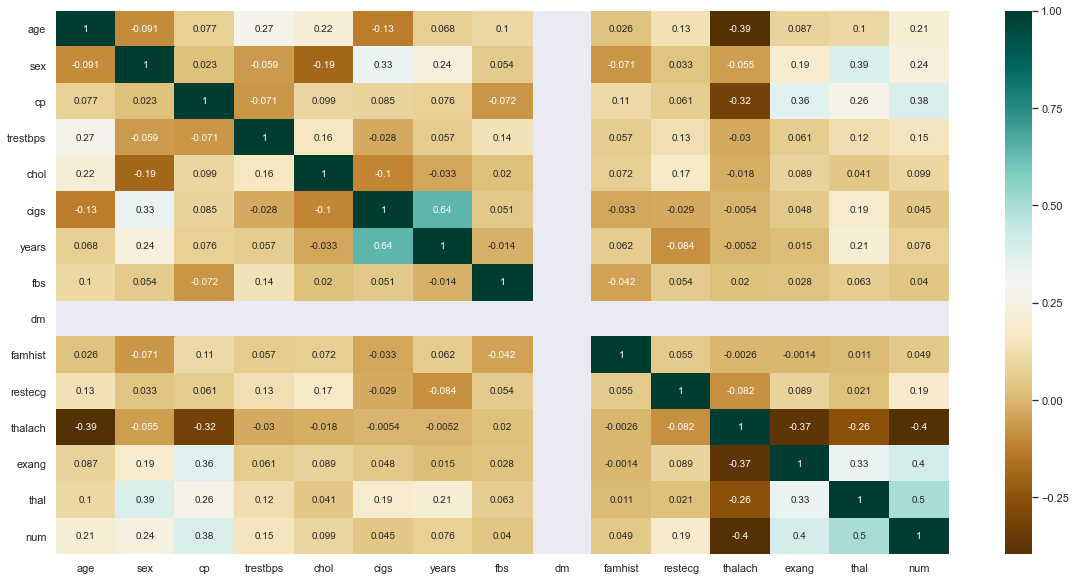

In [9]:
plt.figure(figsize=(20,10))
corr= df.corr()
sns.heatmap(corr,cmap='BrBG',annot=True)
corr
#Using heatmap to check for uncorrelated columns

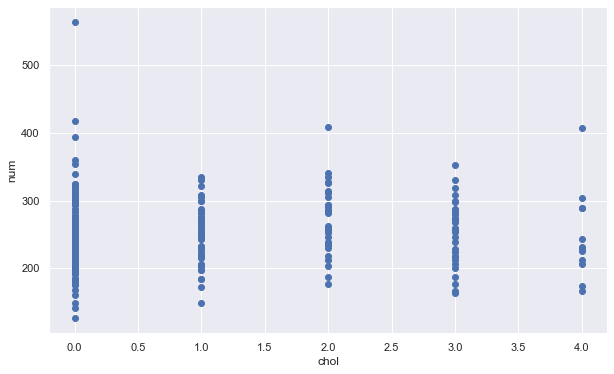

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['num'], df['chol'])
ax.set_xlabel('chol')
ax.set_ylabel('num')
plt.show()
#Looking at one column specifically that is uncorrelated to see what it looks like
#credit to Towards data science "https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14"

In [11]:
df = df.drop(['chol', 'cigs', 'years', 'fbs', 'dm', 'famhist'], axis=1)
#dropping unnecessary columns

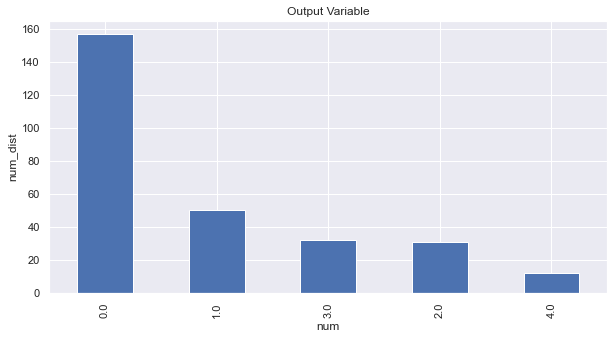

In [12]:
df.num.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Output Variable")
plt.ylabel('num_dist')
plt.xlabel('num');
#Checking distribution of values for dependent variable

61.0
48.0
13.0


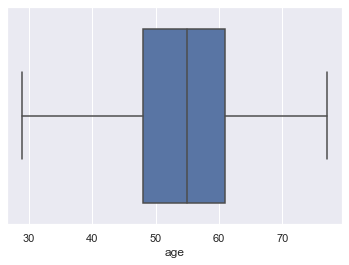

In [13]:
sns.boxplot(x=df['age'])
upper_quartile = np.percentile(df['age'], 75)
lower_quartile = np.percentile(df['age'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [14]:
h_outlier = upper_quartile + (13*1.5)
l_outlier = lower_quartile - (13*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

80.5
28.5


In [15]:
df = df[df.age >= 28.5]
df = df[df.age <= 80.5]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
0,63.0,1.0,1.0,145.0,2.0,150.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,2.0,108.0,1.0,3.0,2.0
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
3,37.0,1.0,3.0,130.0,0.0,187.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,2.0,172.0,0.0,3.0,0.0


4.0
3.0
1.0


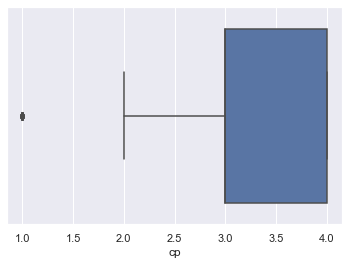

In [16]:
sns.boxplot(x=df['cp'])
upper_quartile = np.percentile(df['cp'], 75)
lower_quartile = np.percentile(df['cp'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [17]:
h_outlier = upper_quartile + (1*1.5)
l_outlier = lower_quartile - (1*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

5.5
1.5


In [18]:
df = df[df.cp >= 1.5]
df = df[df.cp <= 5.5]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
1,67.0,1.0,4.0,160.0,2.0,108.0,1.0,3.0,2.0
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
3,37.0,1.0,3.0,130.0,0.0,187.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,2.0,172.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,0.0,178.0,0.0,3.0,0.0


140.0
120.0
20.0


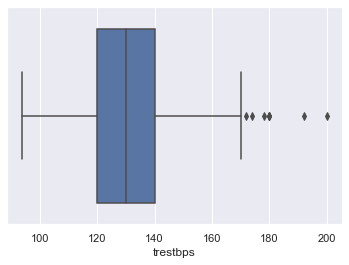

In [19]:
sns.boxplot(x=df['trestbps'])
upper_quartile = np.percentile(df['trestbps'], 75)
lower_quartile = np.percentile(df['trestbps'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [20]:
h_outlier = upper_quartile + (20*1.5)
l_outlier = lower_quartile - (20*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

170.0
90.0


In [21]:
df = df[df.trestbps <= 170]
df = df[df.trestbps >= 90]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
1,67.0,1.0,4.0,160.0,2.0,108.0,1.0,3.0,2.0
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
3,37.0,1.0,3.0,130.0,0.0,187.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,2.0,172.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,0.0,178.0,0.0,3.0,0.0


165.0
132.0
33.0


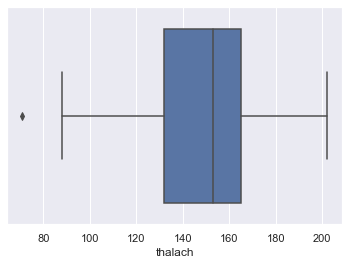

In [22]:
sns.boxplot(x=df['thalach'])
upper_quartile = np.percentile(df['thalach'], 75)
lower_quartile = np.percentile(df['thalach'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [23]:
h_outlier = upper_quartile + (2*1.5)
l_outlier = lower_quartile - (2*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

168.0
129.0


In [24]:
df = df[df.thalach <= 168]
df = df[df.thalach >= 129]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


1.0
0.0
1.0


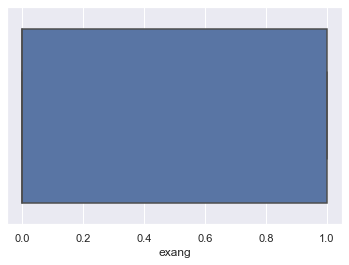

In [25]:
sns.boxplot(x=df['exang'])
upper_quartile = np.percentile(df['exang'], 75)
lower_quartile = np.percentile(df['exang'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [26]:
h_outlier = upper_quartile + (2*1.5)
l_outlier = lower_quartile - (2*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

4.0
-3.0


In [27]:
df = df[df.exang <= 4]
df = df[df.exang >= 0]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


2.0
0.0
2.0


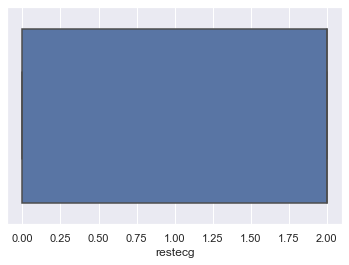

In [28]:
sns.boxplot(x=df['restecg'])
upper_quartile = np.percentile(df['restecg'], 75)
lower_quartile = np.percentile(df['restecg'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [29]:
h_outlier = upper_quartile + (2*1.5)
l_outlier = lower_quartile - (2*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

5.0
-3.0


In [30]:
df = df[df.restecg <= 5]
df = df[df.trestbps >= 0]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


7.0
3.0
4.0


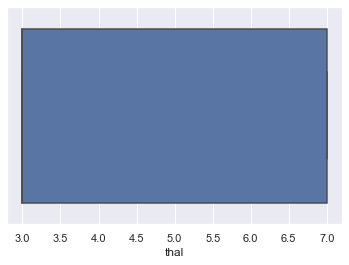

In [31]:
sns.boxplot(x=df['thal'])
upper_quartile = np.percentile(df['thal'], 75)
lower_quartile = np.percentile(df['thal'], 25)
iqr = upper_quartile - lower_quartile
print(upper_quartile)
print(lower_quartile)
print(iqr)
#Checking for distribution of dependent variables and calculating outliers by finding inner quartile range and 1st and 3rd
#Credit to stackoverflow for help with quartile math "https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib"

In [32]:
h_outlier = upper_quartile + (2*1.5)
l_outlier = lower_quartile - (2*1.5)
print(h_outlier)
print(l_outlier)
#Calculating outlier limit values

10.0
0.0


In [33]:
df = df[df.thal <= 10]
df = df[df.thal >= 0]
df.head()
#Dropping outlier rows 

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


<AxesSubplot:xlabel='num'>

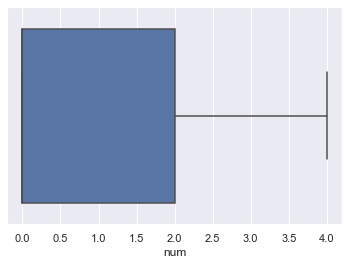

In [34]:
sns.boxplot(x=df['num'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 2 to 280
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       147 non-null    float64
 1   sex       147 non-null    float64
 2   cp        147 non-null    float64
 3   trestbps  147 non-null    float64
 4   restecg   147 non-null    float64
 5   thalach   147 non-null    float64
 6   exang     147 non-null    float64
 7   thal      147 non-null    float64
 8   num       147 non-null    float64
dtypes: float64(9)
memory usage: 11.5 KB


In [38]:
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,thal,num
2,67.0,1.0,4.0,120.0,2.0,129.0,1.0,7.0,1.0
6,62.0,0.0,4.0,140.0,2.0,160.0,0.0,3.0,3.0
7,57.0,0.0,4.0,120.0,0.0,163.0,1.0,3.0,0.0
8,63.0,1.0,4.0,130.0,2.0,147.0,0.0,7.0,2.0
9,53.0,1.0,4.0,140.0,2.0,155.0,1.0,7.0,1.0


In [37]:
df.to_csv('Heart_Data.csv')

I prepared my data for future analysis by first changing null values of -9 to NAN.  Once I got these values to NAN I was able to use a function called simple imputer where null values are changed to the mean of the column rather than getting rid of them completely.  Once those values were changed to the mean. I did some exploratory analsis by checking the the descriptive statistics for each column.  I then used a heat map to see how they correlated with the dependent variable.  I used a scatterplot with one of the columns that didn't correlate very highly to see what it looked like.  I then used a histogram to look at the distribution of values for the dependant variable.  After the exploratory analysis I dropped highly uncorrelated columns.  I then used a box plot and got rid of statistical outliers by taking 1.5 and multiplying by the innerquartile range and adding to the 3rd quartile or subtracting from the 1st and then dropped rows above and below those values. Now the data has been prepped by getting rid of either unecessary or misleading data, or values that wouldn't allow for modeling.